In [1]:
from utils.load_results import *
from utils.plot_helpers import *
from utils.analysis_from_interaction import error_analysis

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('default')
import random
from seaborn.algorithms import bootstrap

# ZeroShot Quantitative analyses
Trying to reproduce the results from the paper "Agents can generalize to novel levels of abstraction with the help of language" using the 3dshapes dataset.

Effectively the results from dataset "(3,4)_game_size_10_vsf_3" and "3dshapes/shapes3d_feat_rep_game_size_10_vsf_3" are compared with each other.


## Loading 

In [ ]:
game_size = 10
n_values = [4,]
n_attributes = [3,]
n_epochs = 300
datasets = ['(3,4)',]
n_datasets = len(datasets)
n_runs = 3
path_3ds_zs = ['results/3dshapes/' + 'shapes3d_feat_rep_game_size_' + str(game_size) + '_vsf_3']
path_zs = ['results/(3,4)_game_size_' + str(game_size) + '_vsf_3']


In [ ]:
zero_shot_test_ds='test_sampled_unscaled'
context_unaware = False # whether original or context_unaware simulations are evaluated
if context_unaware:
    setting = 'context_unaware'
else:
    setting = 'standard' # context-aware

In [ ]:
# 3dshapes 
all_accuracies_3ds = load_accuracies(path_3ds_zs, n_runs=n_runs, n_epochs=300, val_steps=1, zero_shot=True, context_unaware=context_unaware)

# to specific
zs_specific_train_acc_3ds = all_accuracies_3ds['zs_specific_train_acc']
zs_specific_val_acc_3ds = all_accuracies_3ds['zs_specific_val_acc']
zs_specific_test_acc_3ds = all_accuracies_3ds['zs_specific_test_acc']
zs_specific_train_message_length_3ds = all_accuracies_3ds['zs_specific_train_message_length']

# to generic
zs_generic_train_acc_3ds = all_accuracies_3ds['zs_generic_train_acc']
zs_generic_val_acc_3ds = all_accuracies_3ds['zs_generic_val_acc']
zs_generic_test_acc_3ds = all_accuracies_3ds['zs_generic_test_acc']
zs_generic_train_message_length_3ds = all_accuracies_3ds['zs_generic_train_message_length']

"zs_generic_train_acc_3ds = all_accuracies_3ds['zs_generic_train_acc']\nzs_generic_val_acc_3ds = all_accuracies_3ds['zs_generic_val_acc']\nzs_generic_test_acc_3ds = all_accuracies_3ds['zs_generic_test_acc']\nzs_generic_train_message_length_3ds = all_accuracies_3ds['zs_generic_train_message_length']"

In [ ]:
# Not 3dshapes
all_accuracies = load_accuracies(path_zs, n_runs=n_runs, n_epochs=300, val_steps=1, zero_shot=True, context_unaware=context_unaware)

# to specific
zs_specific_train_acc = all_accuracies['zs_specific_train_acc']
zs_specific_val_acc = all_accuracies['zs_specific_val_acc']
zs_specific_test_acc = all_accuracies['zs_specific_test_acc']
zs_specific_train_message_length = all_accuracies['zs_specific_train_message_length']

# to generic
zs_generic_train_acc = all_accuracies['zs_generic_train_acc']
zs_generic_val_acc = all_accuracies['zs_generic_val_acc']
zs_generic_test_acc = all_accuracies['zs_generic_test_acc']
zs_generic_train_message_length = all_accuracies['zs_generic_train_message_length']

"zs_generic_train_acc = all_accuracies['zs_generic_train_acc']\nzs_generic_val_acc = all_accuracies['zs_generic_val_acc']\nzs_generic_test_acc = all_accuracies['zs_generic_test_acc']\nzs_generic_train_message_length = all_accuracies['zs_generic_train_message_length']"

# Comparing Training and Validation
## "to specific"

In [7]:
# Final Training Accuracies
zs_specific_final_accuracies_train_3ds = {}
zs_specific_final_accuracies_train_st = {}

for i, d in enumerate(datasets):
    gather_accuracies_3ds = []
    gather_accuracies_st = []

    for run in range(n_runs):
        gather_accuracies_3ds.append(all_accuracies_3ds['zs_specific_train_acc'][i][run][-1])
        gather_accuracies_st.append(all_accuracies['zs_specific_train_acc'][i][run][-1])
    zs_specific_final_accuracies_train_3ds = (round(np.mean(gather_accuracies_3ds), 3), round(np.std(gather_accuracies_3ds), 3))
    zs_specific_final_accuracies_train_st = (round(np.mean(gather_accuracies_st), 3), round(np.std(gather_accuracies_st), 3))

# Final Validation accuracies
zs_specific_final_accuracies_val_3ds = {}
zs_specific_final_accuracies_val_st = {}

for i, d in enumerate(datasets):
    gather_accuracies_3ds = []
    gather_accuracies_st = []

    for run in range(n_runs):
        gather_accuracies_3ds.append(all_accuracies_3ds['zs_specific_val_acc'][i][run][-1])
        gather_accuracies_st.append(all_accuracies['zs_specific_val_acc'][i][run][-1])
    zs_specific_final_accuracies_val_3ds = (round(np.mean(gather_accuracies_3ds), 3), round(np.std(gather_accuracies_3ds), 3))
    zs_specific_final_accuracies_val_st = (round(np.mean(gather_accuracies_st), 3), round(np.std(gather_accuracies_st), 3))

data = {'training': [zs_specific_final_accuracies_train_3ds, zs_specific_final_accuracies_train_st], 
        'validation': [zs_specific_final_accuracies_val_3ds, zs_specific_final_accuracies_val_st]}
comparison_to_specific = pd.DataFrame(data=data, index=["shapes3d", "standard"])

latex_table_1 = comparison_to_specific.to_latex(index=True, escape=False)

print("Final Training Accuracies (to specific):")
print(comparison_to_specific)
# Paper: 0.99, 0.98

Final Training Accuracies (to specific):
                training      validation
shapes3d  (0.911, 0.005)  (0.849, 0.012)
standard  (0.994, 0.004)  (0.978, 0.008)


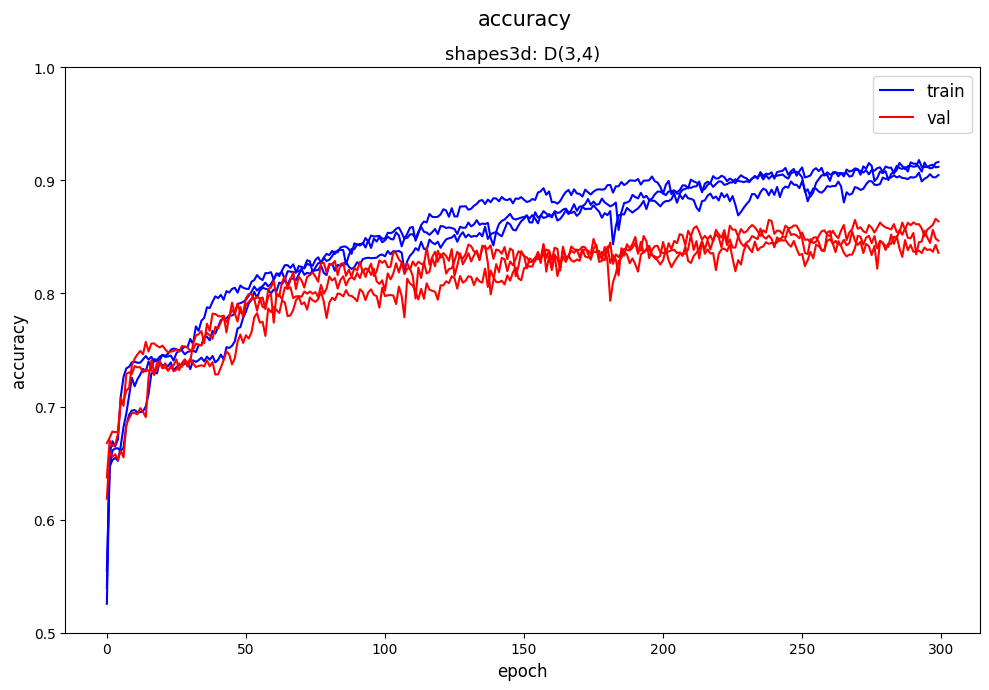

In [8]:
plot_training_trajectory(shapes3d=True, results_train=all_accuracies_3ds['zs_specific_train_acc'], results_val=all_accuracies_3ds['zs_specific_val_acc'], ylim=(0.5, 1), steps=(1, 1), plot_indices=(1, ), plot_shape=(1, 1))

## "to generic"

In [9]:
# Final Training Accuracies
zs_generic_final_accuracies_train_3ds = {}
zs_generic_final_accuracies_train_st = {}

for i, d in enumerate(datasets):
    gather_accuracies_3ds = []
    gather_accuracies_st = []

    for run in range(n_runs):
        gather_accuracies_3ds.append(all_accuracies_3ds['zs_generic_train_acc'][i][run][-1])
        gather_accuracies_st.append(all_accuracies['zs_generic_train_acc'][i][run][-1])
    zs_generic_final_accuracies_train_3ds = (round(np.mean(gather_accuracies_3ds), 3), round(np.std(gather_accuracies_3ds), 3))
    zs_generic_final_accuracies_train_st = (round(np.mean(gather_accuracies_st), 3), round(np.std(gather_accuracies_st), 3))

# Final Validation accuracies
zs_generic_final_accuracies_val_3ds = {}
zs_generic_final_accuracies_val_st = {}

for i, d in enumerate(datasets):
    gather_accuracies_3ds = []
    gather_accuracies_st = []

    for run in range(n_runs):
        gather_accuracies_3ds.append(all_accuracies_3ds['zs_generic_val_acc'][i][run][-1])
        gather_accuracies_st.append(all_accuracies['zs_generic_val_acc'][i][run][-1])
    zs_generic_final_accuracies_val_3ds = (round(np.mean(gather_accuracies_3ds), 3), round(np.std(gather_accuracies_3ds), 3))
    zs_generic_final_accuracies_val_st = (round(np.mean(gather_accuracies_st), 3), round(np.std(gather_accuracies_st), 3))

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
data = {'training': [zs_generic_final_accuracies_train_3ds, zs_generic_final_accuracies_train_st], 
        'validation': [zs_generic_final_accuracies_val_3ds, zs_generic_final_accuracies_val_st]}

comparison_to_generic = pd.DataFrame(data=data, index=["shapes3d", "standard"])
latex_table_2 = comparison_to_generic.to_latex(index=True, escape=False)

print("Final Training Accuracies (to generic):")
print(comparison_to_generic)
# Paper: 0.99, 0.98

Final Training Accuracies (to generic):
                training      validation
shapes3d  (0.931, 0.007)  (0.909, 0.002)
standard  (0.984, 0.014)  (0.973, 0.016)


# Comparing Test Accuracies 

In [10]:
# 3dshapes
zs_specific_test_acc_mean_3ds = np.mean(zs_specific_test_acc_3ds)
#zs_generic_test_acc_mean_3ds = np.mean(zs_generic_test_acc_3ds)

# standard
zs_specific_test_acc_mean = np.mean(zs_specific_test_acc)
#zs_generic_test_acc_mean = np.mean(zs_generic_test_acc)

In [12]:
data = {'to specific': [zs_specific_test_acc_mean_3ds, zs_specific_test_acc_mean]}#, 
        #'to generic': [zs_generic_test_acc_mean_3ds, zs_generic_test_acc_mean]}

comparison_test_acc = pd.DataFrame(data=data, index=["shapes3d", "standard"])
latex_table_3 = comparison_test_acc.to_latex(index=True, escape=False)

print("Comparing Test accuracies (both conditions):")
print(comparison_test_acc)
# Previous results:
# shapes3d     0.823766    0.844885

Comparing Test accuracies (both conditions):
          to specific
shapes3d     0.879583
standard     0.902214


### Interpretation of the training accuracies of both conditions as well as Test accuracy comparison:

- Slight overfitting in the 3dshapes=True condition (difference between training and validation scores bigger for the 3dshapes condition than for the symbolic dataset condition)
- Comparison of test accuracies shows perforance is still acceptable and comparable to the symbolic dataset condition (0.88 for sapes3d=True vs 0.90 for shapes3d=False)

# Comparing NMI, Effectiveness and Consistency

In [ ]:
# 3dshapes
zs_entropy_scores_specific_3ds, zs_entropy_scores_generic_3ds = load_entropies_zero_shot(path_3ds_zs, n_runs=n_runs, context_unaware=context_unaware, zero_shot_test_ds=zero_shot_test_ds, verbose=True)  
entropies_specific_3ds = [zs_entropy_scores_specific_3ds['NMI'], zs_entropy_scores_specific_3ds['effectiveness'], zs_entropy_scores_specific_3ds['consistency']]
#entropies_generic_3ds = [zs_entropy_scores_generic_3ds['NMI'], zs_entropy_scores_generic_3ds['effectiveness'], zs_entropy_scores_generic_3ds['consistency']]

# standard
zs_entropy_scores_specific_st, zs_entropy_scores_generic_st = load_entropies_zero_shot(path_zs, n_runs=n_runs, context_unaware=context_unaware, zero_shot_test_ds=zero_shot_test_ds)  
entropies_specific_st = [zs_entropy_scores_specific_st['NMI'], zs_entropy_scores_specific_st['effectiveness'], zs_entropy_scores_specific_st['consistency']]
#entropies_generic_st = [zs_entropy_scores_generic_st['NMI'], zs_entropy_scores_generic_st['effectiveness'], zs_entropy_scores_generic_st['consistency']]

Entropy scores loaded from: results/3dshapes/shapes3d_feat_rep_game_size_10_vsf_3/standard/zero_shot/specific/0/entropy_scores.pkl
Entropy scores loaded from: results/3dshapes/shapes3d_feat_rep_game_size_10_vsf_3/standard/zero_shot/specific/1/entropy_scores.pkl
Entropy scores loaded from: results/3dshapes/shapes3d_feat_rep_game_size_10_vsf_3/standard/zero_shot/specific/2/entropy_scores.pkl


In [21]:
data = {'to specific': [np.mean(entropies_specific_3ds[0]), np.mean(entropies_specific_st[0])]}#, 
        #'to generic': [np.mean(entropies_generic_3ds[0]), np.mean(entropies_generic_st[0])]}

comparison_entropy = pd.DataFrame(data=data, index=["shapes3d", "standard"])
latex_table_2 = comparison_entropy.to_latex(index=True, escape=False)

data = {'to specific': [entropies_specific_3ds[0]]}#, 
        #'to generic': [entropies_generic_3ds[0]]}

print("All to specific NMI scores (3dshapes): ", data)

print("Comparing NMI (both conditions):")
print(comparison_entropy)
# Paper: 0.93, 0.87

All to specific NMI scores (3dshapes):  {'to specific': [array([[0.60746479, 0.60589881, 0.60629485]])]}
Comparing NMI (both conditions):
          to specific
shapes3d     0.606553
standard     0.917209


In [22]:
data = {'to specific': [np.mean(entropies_specific_3ds[1]), np.mean(entropies_specific_st[1])]}#, 
        #'to generic': [np.mean(entropies_generic_3ds[0]), np.mean(entropies_generic_st[0])]}

comparison_entropy = pd.DataFrame(data=data, index=["shapes3d", "standard"])
latex_table_2 = comparison_entropy.to_latex(index=True, escape=False)

data = {'to specific': [entropies_specific_3ds[0]]}#, 
        #'to generic': [entropies_generic_3ds[0]]}

print("All to specific effeciveness scores (3dshapes): ", data)

print("Comparing effectiveness (both conditions):")
print(comparison_entropy)

All to specific effeciveness scores (3dshapes):  {'to specific': [array([[0.60746479, 0.60589881, 0.60629485]])]}
Comparing effectiveness (both conditions):
          to specific
shapes3d     0.555304
standard     0.951090


In [23]:
data = {'to specific': [np.mean(entropies_specific_3ds[2]), np.mean(entropies_specific_st[2])]}#, 
        #'to generic': [np.mean(entropies_generic_3ds[0]), np.mean(entropies_generic_st[0])]}

comparison_entropy = pd.DataFrame(data=data, index=["shapes3d", "standard"])
latex_table_2 = comparison_entropy.to_latex(index=True, escape=False)

data = {'to specific': [entropies_specific_3ds[0]]}#, 
        #'to generic': [entropies_generic_3ds[0]]}

print("All to specific consistency scores (3dshapes): ", data)

print("Comparing consistency (both conditions):")
print(comparison_entropy)

All to specific consistency scores (3dshapes):  {'to specific': [array([[0.60746479, 0.60589881, 0.60629485]])]}
Comparing consistency (both conditions):
          to specific
shapes3d     0.668785
standard     0.885682


### Interpretation of the NMI, Effectiveness and Consistency Comparison

# Compositionality - Topsim

In [ ]:
# standard
topsim_train_specific_st, topsim_test_specific_st = np.zeros((n_datasets, n_runs)), np.zeros((n_datasets, n_runs))
topsim_train_generic_st, topsim_test_generic_st = np.zeros((n_datasets, n_runs)), np.zeros((n_datasets, n_runs))

for d, dataset in enumerate(datasets): 
    for cond in ['specific', 'generic']:
        for run in range(n_runs):
            if cond == 'specific':
                topsim_train_val_score_specific_st = pickle.load(open(path_zs[d] + '/' + setting + '/' + str(cond) + '/' + str(run) + '/topsim_final.pkl', 'rb'))
                topsim_test_score_specific_st = pickle.load(open(path_zs[d] + '/' + setting + '/' + str(cond) + '/' + str(run) + '/topsim_final_' + zero_shot_test_ds + '.pkl', 'rb'))
                topsim_train_specific_st[d, run] = topsim_train_val_score_specific_st['topsim_train']
                topsim_test_specific_st[d, run] = topsim_test_score_specific_st['topsim_test']
            else:
                topsim_train_val_score_generic_st = pickle.load(open(path_zs[d] + '/' + setting + '/' + str(cond) + '/' + str(run) + '/topsim_final.pkl', 'rb'))
                topsim_test_score_generic_st = pickle.load(open(path_zs[d] + '/' + setting + '/' + str(cond) + '/' + str(run) + '/topsim_final_' + zero_shot_test_ds + '.pkl', 'rb'))
                topsim_train_generic_st[d, run] = topsim_train_val_score_generic_st['topsim_train']
                topsim_test_generic_st[d, run] = topsim_test_score_generic_st['topsim_test']

In [ ]:
# 3dshapes
topsim_train_specific_3ds, topsim_test_specific_3ds = np.zeros((n_datasets, n_runs)), np.zeros((n_datasets, n_runs))
topsim_train_generic_3ds, topsim_test_generic_3ds = np.zeros((n_datasets, n_runs)), np.zeros((n_datasets, n_runs))

for d, dataset in enumerate(datasets): 
    for cond in ['specific', 'generic']:
        for run in range(n_runs):
            if cond == 'specific':
                topsim_train_val_score_specific_3ds = pickle.load(open(path_3ds_zs[d] + '/' + setting + '/' + str(cond) + '/' + str(run) + '/topsim_final.pkl', 'rb'))
                topsim_test_score_specific_3ds = pickle.load(open(path_3ds_zs[d] + '/' + setting + '/' + str(cond) + '/' + str(run) + '/topsim_final_' + zero_shot_test_ds + '.pkl', 'rb'))
                topsim_train_specific_3ds[d, run] = topsim_train_val_score_specific_3ds['topsim_train']
                topsim_test_specific_3ds[d, run] = topsim_test_score_specific_3ds['topsim_test']
            else:
                topsim_train_val_score_generic_3ds = pickle.load(open(path_3ds_zs[d] + '/' + setting + '/' + str(cond) + '/' + str(run) + '/topsim_final.pkl', 'rb'))
                topsim_test_score_generic_3ds = pickle.load(open(path_3ds_zs[d] + '/' + setting + '/' + str(cond) + '/' + str(run) + '/topsim_final_' + zero_shot_test_ds + '.pkl', 'rb'))
                topsim_train_generic_3ds[d, run] = topsim_train_val_score_generic_3ds['topsim_train']
                topsim_test_generic_3ds[d, run] = topsim_test_score_generic_3ds['topsim_test']

In [ ]:
data_train_test_3ds = {'to specific': [np.mean(topsim_train_specific_3ds[0]), np.mean(topsim_test_specific_3ds[0])], 
                        'to generic': [np.mean(topsim_train_generic_3ds[0]), np.mean(topsim_test_generic_3ds[0])]}

data_train_test_st= {'to specific': [np.mean(topsim_train_specific_st[0]), np.mean(topsim_test_specific_st[0])], 
                        'to generic': [np.mean(topsim_train_generic_st[0]), np.mean(topsim_test_generic_st[0])]}

# 3dshapes table
comparison_topsim_3ds = pd.DataFrame(data=data_train_test_3ds, index=["train", "test"])
latex_table_3 = comparison_topsim_3ds.to_latex(index=True, escape=False)

# symbolic dataset table
comparison_topsim_st = pd.DataFrame(data=data_train_test_st, index=["train", "test"])
latex_table_4 = comparison_topsim_st.to_latex(index=True, escape=False)


print("Comparing topsim from 3dshapes:")
print(comparison_topsim_3ds)

print("Comparing topsim from symb.dataset:")
print(comparison_topsim_st)